**Linear Regression**

Linear regression is a type of statistical analysis used to predict the relationship between two variables. It assumes a linear relationship between the independent variable and the dependent variable, and aims to find the best-fitting line that describes the relationship. The line is determined by minimizing the sum of the squared differences between the predicted values and the actual values.


---



**Simple Linear Regression**

In a simple linear regression, there is one independent variable and one dependent variable. The model estimates the slope and intercept of the line of best fit, which represents the relationship between the variables.

**The slope represents the change in the dependent variable for each unit change in the independent variable, while the intercept represents the predicted value of the dependent variable when the independent variable is zero.**

Linear regression is a quiet and the simplest statistical regression method used for predictive analysis in machine learning. Linear regression shows the linear relationship between the independent(predictor) variable i.e. X-axis and the dependent(output) variable i.e. Y-axis, called linear regression. If there is a single input variable X(independent variable), such linear regression is called simple linear regression.

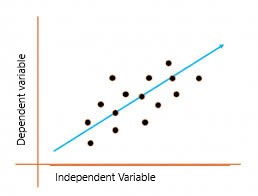

**Yi = β0 + β1Xi**

where Yi = Dependent variable,  β0 = constant/Intercept, β1 = Slope/Intercept, Xi = Independent variable.

This algorithm explains the linear relationship between the dependent(output) variable y and the independent(predictor) variable X using a straight line  Y= B0 + B1 X.


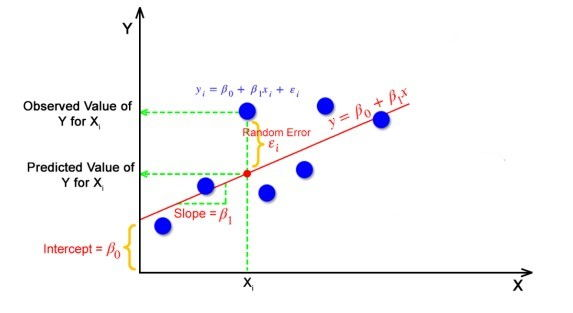

The goal of the linear regression algorithm is to get the best values for B0 and B1 to find the best fit line. The best fit line is a line that has the least error which means the error between predicted values and actual values should be minimum.

---



**Random Error(Residuals)**

In regression, the difference between the observed value of the dependent variable(yi) and the predicted value(predicted) is called the residuals.

εi =  ypredicted –   yi

where ypredicted =   B0 + B1 Xi

Cost Function for Linear Regression

The cost function helps to work out the optimal values for B0 and B1, which provides the best fit line for the data points.

In Linear Regression, generally Mean Squared Error (MSE) cost function is used, which is the average of squared error that occurred between the ypredicted and yi.

We calculate MSE using simple linear equation y=mx+b:
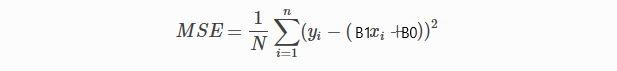


Using the MSE function, we’ll update the values of B0 and B1 such that the MSE value settles at the minima.  These parameters can be determined using the gradient descent method such that the value for the cost function is minimum.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [6]:
data = pd.read_csv('/content/data_for_lr.csv')
#data=pd.read_csv('/content/Salary_Data.csv')

In [7]:
# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [8]:
class LinearRegression:
	def __init__(self):
		self.parameters = {}

	def forward_propagation(self, train_input):
		m = self.parameters['m']
		c = self.parameters['c']
		predictions = np.multiply(m, train_input) + c
		return predictions

	def cost_function(self, predictions, train_output):
		cost = np.mean((train_output - predictions) ** 2)
		return cost

	def backward_propagation(self, train_input, train_output, predictions):
		derivatives = {}
		df = (train_output - predictions) * -1
		dm = np.mean(np.multiply(train_input, df))
		dc = np.mean(df)
		derivatives['dm'] = dm
		derivatives['dc'] = dc
		return derivatives

	def update_parameters(self, derivatives, learning_rate):
		self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
		self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

	def train(self, train_input, train_output, learning_rate, iters):
		#initialize random parameters
		self.parameters['m'] = np.random.uniform(0,1) * -1
		self.parameters['c'] = np.random.uniform(0,1) * -1

		#initialize loss
		self.loss = []

		#iterate
		for i in range(iters):
			#forward propagation
			predictions = self.forward_propagation(train_input)

			#cost function
			cost = self.cost_function(predictions, train_output)

			#append loss and print
			self.loss.append(cost)
			print("Iteration = {}, Loss = {}".format(i+1, cost))

			#back propagation
			derivatives = self.backward_propagation(train_input, train_output, predictions)

			#update parameters
			self.update_parameters(derivatives, learning_rate)

		return self.parameters, self.loss


In [9]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

Iteration = 1, Loss = 12036.914281773987
Iteration = 2, Loss = 5465.465465037395
Iteration = 3, Loss = 2483.9918564810446
Iteration = 4, Loss = 1131.2939762806468
Iteration = 5, Loss = 517.573448134551
Iteration = 6, Loss = 239.12776313734338
Iteration = 7, Loss = 112.79664584110134
Iteration = 8, Loss = 55.48007639923211
Iteration = 9, Loss = 29.47548376232968
Iteration = 10, Loss = 17.677169684357025
Iteration = 11, Loss = 12.3242599241108
Iteration = 12, Loss = 9.895637242092874
Iteration = 13, Loss = 8.793766846608326
Iteration = 14, Loss = 8.29384543316981
Iteration = 15, Loss = 8.06702893970941
Iteration = 16, Loss = 7.964120451025662
Iteration = 17, Loss = 7.917429161435011
Iteration = 18, Loss = 7.896243677421689
Iteration = 19, Loss = 7.886630205730389
Iteration = 20, Loss = 7.882266968927534


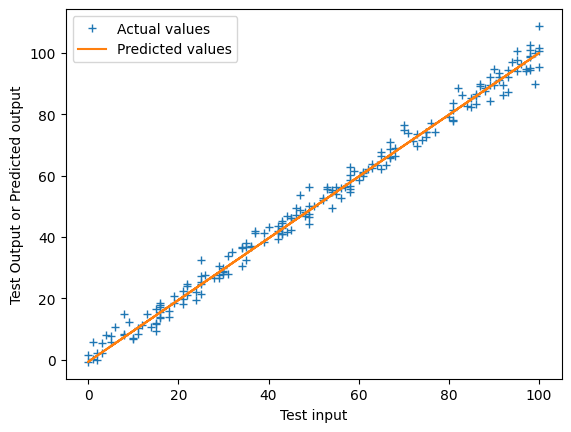

In [10]:
#Prediction on test data
y_pred = test_input*parameters['m'] + parameters['c']

# Plot the regression line with actual data pointa
plt.plot(test_input, test_output, '+', label='Actual values')
plt.plot(test_input, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()